In [11]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pickle
import ast
import pandas as pd
import numpy as np
import time
from sys import exc_info
import subprocess
import os

class ElbowMethod():
    
    def __init__(self, verbose=0):
        init_timer = time.time()
        self.df_r, self.df_b, self.df_bt, self.df_t = self._load_df(verbose=verbose)
        self.df_bt_pivot = self._load_sparse_matrix(verbose=verbose)
        if verbose > 0:
            print("Time to init:", time.time() - init_timer, "sec")
        
        
    def _load_df(self, verbose):
        if verbose > 0:
            print("Loading ratings.csv ...")
        df_r = pd.read_csv('csv/ratings.csv')
        df_r.sort_values(by="user_id", inplace=True, ignore_index=True)
        df_r = df_r.reset_index(drop=True)
        if verbose > 0:
            print("Done")
            print("Loading books.csv ...")
        df_b = pd.read_csv('csv/books.csv')
        if verbose > 0:
            print("Done")
            print("Loading book_tags.csv ...")
        df_bt = pd.read_csv('csv/book_tags.csv')
        if verbose > 0:
            print("Done")
            print("Loading tags.csv ...")
        df_t = pd.read_csv('csv/tags.csv')
        if verbose > 0:
            print("Done")
        return df_r, df_b, df_bt, df_t
    
    
    def _load_sparse_matrix(self, verbose):
        if verbose > 0:
            print("computing sparse matrix ...")
            
        # some books are marked as having been tagged a negative number of times
        # with a certain tag; we drop those lines from df_bt
        idx = list(self.df_bt.loc[self.df_bt["count"] < 0].index.values)
        df_bt_2 = self.df_bt.drop(labels=idx)
        
        # there are some duplicates in df_bt_2, we drop them
        df_bt_2.drop_duplicates(subset=["goodreads_book_id", "tag_id"], inplace=True)
        
        # delete tags that tag less than n books

        # delete all tags that have a low count
        
        # compute the sparse matrix, by filling all null values with 0
        df_bt_pivot = df_bt_2.pivot(index="goodreads_book_id", columns ="tag_id", values="count").fillna(0)
        
        # PCA into n dimensions
        
        # add all ratings + languages
        
        
        # feature selection
        
        if verbose > 0:
            print("Done")
        
        return df_bt_pivot

        
    def run(self, n_min, n_max, max_iterations=300, verbose=0):
        run_timer = time.time()
        wcss = []
        differences = []
        
        if verbose:
            print(f"Begin fitting for {n_max - n_min + 1} different numbers of clusters ...")
        
        for n_clusters in range(n_min, n_max + 1):
            if verbose:
                print(f"Fitting for {n_clusters} clusters ...")
            kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iterations, n_init=10)
            kmeans.fit(self.df_bt_pivot.values)
            wcss.append(kmeans.inertia_)
            if verbose:
                print("Done")
        
        for i in range(len(wcss)-1):
            differences.append(wcss[i] - wcss[i+1])
        
        if verbose > 0:
            print("Run time:", time.time() - run_timer, "sec")
        
        self._plot(wcss, differences, 10)
    
    def _plot(self, wcss, differences, boundary, upto=None):
        if upto == None:
            wcss = wcss
            diff = differences
        else:
            wcss = wcss[:upto]
            diff = differences[:upto]
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(121).set_title("wcss = f(n_clusters)")
        plt.plot(range(1, len(wcss) + 1), wcss)
        plt.grid()
        
        plt.subplot(122).set_title("differences in each subsequent n_clusters")
        X = range(1, len(diff) + 1)
        plt.plot(X, diff)
        plt.plot(X, np.ones(len(diff)) * boundary, "r")
        plt.plot(X, np.ones(len(diff)) * (-boundary), "r")
        
        plt.show()

In [12]:
elbow_method = ElbowMethod(verbose=1)

Loading ratings.csv ...
Done
Loading books.csv ...
Done
Loading book_tags.csv ...
Done
Loading tags.csv ...
Done
computing sparse matrix ...
Done
Time to init: 2.6409664154052734 sec


Begin fitting for 20 different numbers of clusters ...
Fitting for 1 clusters ...
Done
Fitting for 2 clusters ...
Done
Fitting for 3 clusters ...
Done
Fitting for 4 clusters ...
Done
Fitting for 5 clusters ...
Done
Fitting for 6 clusters ...
Done
Fitting for 7 clusters ...
Done
Fitting for 8 clusters ...
Done
Fitting for 9 clusters ...
Done
Fitting for 10 clusters ...
Done
Fitting for 11 clusters ...
Done
Fitting for 12 clusters ...
Done
Fitting for 13 clusters ...
Done
Fitting for 14 clusters ...
Done
Fitting for 15 clusters ...
Done
Fitting for 16 clusters ...
Done
Fitting for 17 clusters ...
Done
Fitting for 18 clusters ...
Done
Fitting for 19 clusters ...
Done
Fitting for 20 clusters ...
Done
Run time: 127.33385467529297 sec


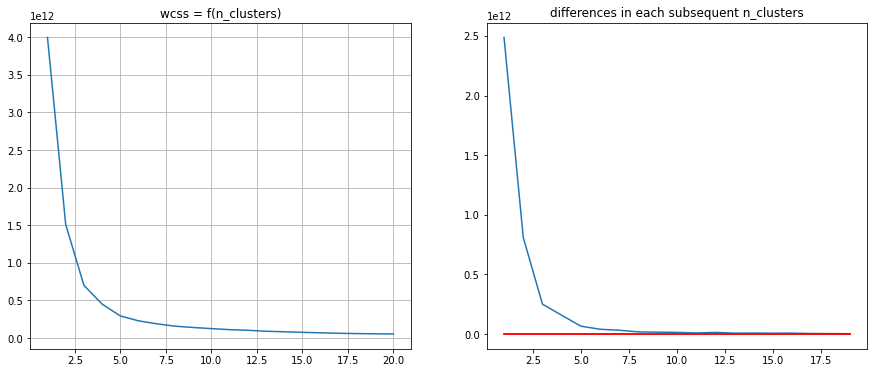

In [13]:
elbow_method.run(1, 20, verbose=1)